# Titer analysis for mutant viruses

RLU titering and p24 ELISAs for all viruses made for this study that grew well in initial titering. 

This includes the double mutant viruses that were not actually run in neuts. 

Most of these viruses were grown by Andrea Loes. The December viruses were grown by Amin Addetia and the WT virus for neuts (September) was grown by Kate Crawford.

Initial titering was done by whoever grew the virus. Kate Crawford did final titering and p24 ELISAs.

Each virus was titered or run in the p24 ELISA in duplicate. Values were averaged prior to plotting and a single point is shown for each virus. 

Raw data is in the January 22 and 25, 2021 excel files in the `./data` subdirectory. Those excel files include titer and p24 calculations.

In [1]:
import os
import warnings

from IPython.display import display, HTML
from IPython.display import display, SVG
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from plotnine import *


In [2]:
warnings.simplefilter('ignore')

In [3]:
CBP = ('#999999', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7')
plt.style.use('seaborn-white')
theme_set(theme_seaborn(style='white', context='talk', font='FreeSans', font_scale=1))

In [4]:
resultsdir='results/p24_titering/'
os.makedirs(resultsdir, exist_ok=True)

## Read in csv of cleaned titer and p24 data

In [5]:
df = pd.read_csv('./data/210125_p24_titers_calc.csv').set_index('VirusNumber', drop=True)
display(df)

,Sample,VirusDate,Used in neuts,p24 pg/mL,Avg RLU/mL,Median RLU/mL,TechRep,Neut Dilution
VirusNumber,,,,,,,,
1,WT,20-10-30,N,8.889640e+05,401000000.0,384134400,1,NaN
2,P384L,20-10-30,Y,1.085360e+06,209000000.0,189574400,1,20.0
3,F456K,20-10-30,Y,1.302027e+06,304000000.0,299872000,1,10.0
4,E484Q,20-10-30,Y,1.022748e+06,72900000.0,76072000,1,20.0
5,G485R,20-10-30,Y,7.605856e+05,299541114.3,294278200,1,32.0
6,S494P,20-10-30,Y,1.051577e+06,106000000.0,107374200,1,50.0
7,G446V/F456V,20-10-30,N,7.686937e+05,39600000.0,43172400,1,NaN
8,G446V/F456V/E484P,20-10-30,Y,8.141892e+05,48100000.0,49775200,1,6.0
9,WT,20-10-16,N,1.787613e+06,416523628.6,425927200,1,NaN


## Add columns for avg and median RLUs normalized by p24

In [6]:
# add columns for Avg and median RLUs normalized by p24
df['Avg RLU/pg p24'] = df['Avg RLU/mL'] / df['p24 pg/mL']
df['Med RLU/pg p24'] = df['Median RLU/mL'] / df['p24 pg/mL']
display(df.head())

,Sample,VirusDate,Used in neuts,p24 pg/mL,Avg RLU/mL,Median RLU/mL,TechRep,Neut Dilution,Avg RLU/pg p24,Med RLU/pg p24
VirusNumber,,,,,,,,,,
1,WT,20-10-30,N,8.889640e+05,401000000.0,384134400,1,NaN,451.086900,432.114703
2,P384L,20-10-30,Y,1.085360e+06,209000000.0,189574400,1,20.0,192.562766,174.664932
3,F456K,20-10-30,Y,1.302027e+06,304000000.0,299872000,1,10.0,233.482106,230.311665
4,E484Q,20-10-30,Y,1.022748e+06,72900000.0,76072000,1,20.0,71.278574,74.380023
5,G485R,20-10-30,Y,7.605856e+05,299541114.3,294278200,1,32.0,393.829574,386.910018


## Order samples by spike mutant

Order is NoVEP/None, WT, single mutants, double mutants, triple mutant.

In [7]:
# change 'NoVEP' to 'None'
df['Sample'] = df['Sample'].replace('NoVEP', 'None')

# order muts in a logical way
mut_list = ['None', 'WT', 'C432D', 'E484K', 'E484P', 'E484Q', 'F456A', 'F456K',
            'F456V', 'G446V', 'G485R', 'P384L', 'S494P', 'F456A/E484P', 'F456V/E484P', 'G446V/F456V',
            'G446V/F456V/E484P']
mut_cat = pd.Categorical(df['Sample'], categories=mut_list)
df = df.assign(mut_order = mut_cat)

# add linebreak for triple mutant
df['mut_order'] = df['mut_order'].replace('G446V/F456V/E484P', 'G446V/F456V/\nE484P')

## Plots

### Plot avg RLUs/pg p24

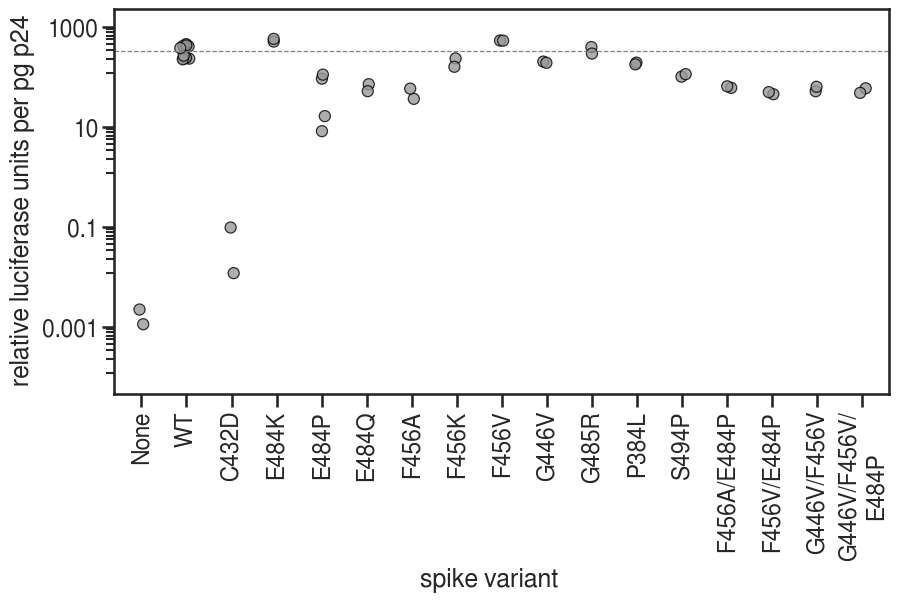

In [8]:
avgrlu_p24_all = (ggplot(df, aes(x='mut_order', y='Avg RLU/pg p24', fill='Used in neuts')) +
                  geom_point(size=4, alpha=0.8, position=position_jitterdodge(jitter_width=0.2, jitter_height=0, dodge_width=0.2, random_state=123)) +
#             geom_crossbar(data=luc_titers.groupby('Spike', as_index=False).aggregate(Titer=pd.NamedAgg('Avg RLU per mL', 'mean')),
#                           mapping=aes(x='Spike', y='Titer', ymin='Titer', ymax='Titer'), color='black') +
                  scale_fill_manual(values=[CBP[0], CBP[0]], guide=False) +
                  theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                        figure_size=(10,5)) +
                  geom_hline(yintercept=np.mean(df[df['mut_order']=='WT']['Avg RLU/pg p24']), 
                        linetype='dashed', color='grey') +
                  scale_y_continuous(trans='log10', limits=[0.0001, 1e3]) +
                  ylab('relative luciferase units per pg p24') + 
                  xlab('spike variant')
            )

_ = avgrlu_p24_all.draw()

### Plot median RLUs/pg p24

Saving to results/p24_titering//median_p24_norm_titers.pdf


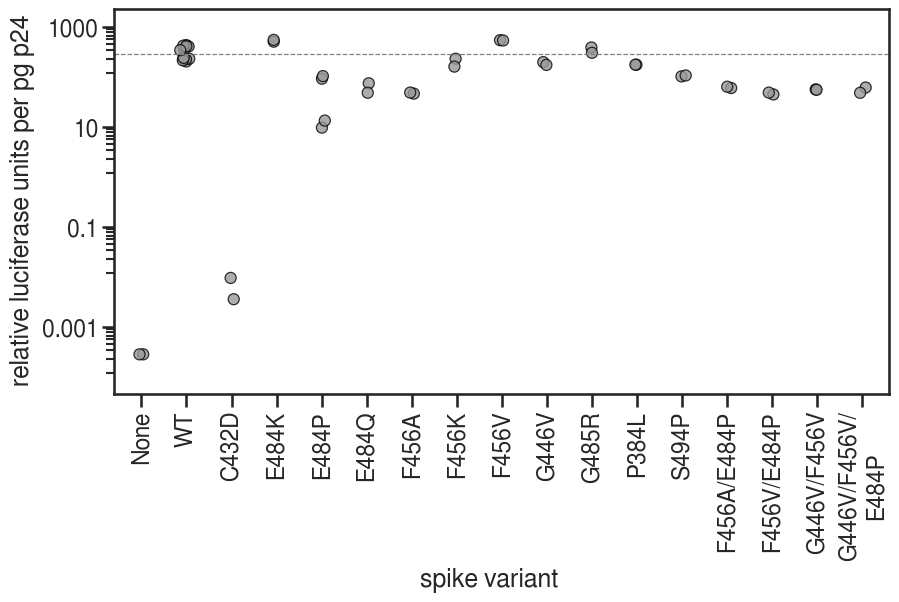

In [9]:
medrlu_p24_all = (ggplot(df, aes(x='mut_order', y='Med RLU/pg p24', fill='Used in neuts')) +
            geom_point(size=4, alpha=0.8, position=position_jitterdodge(jitter_width=0.2, jitter_height=0, dodge_width=0.2, random_state=123)) +
#             geom_crossbar(data=luc_titers.groupby('Spike', as_index=False).aggregate(Titer=pd.NamedAgg('Avg RLU per mL', 'mean')),
#                           mapping=aes(x='Spike', y='Titer', ymin='Titer', ymax='Titer'), color='black') +
            scale_fill_manual(values=[CBP[0], CBP[0]], guide=False) +
            theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                  figure_size=(10,5)) +
            geom_hline(yintercept=np.median(df[df['mut_order']=='WT']['Med RLU/pg p24']), 
                       linetype='dashed', color='grey') +
            scale_y_continuous(trans='log10', limits=[0.0001, 1e3]) +
            ylab('relative luciferase units per pg p24') + 
            xlab('spike variant')
            )

_ = medrlu_p24_all.draw()

plotfile = f'{resultsdir}/median_p24_norm_titers.pdf'
print(f"Saving to {plotfile}")
medrlu_p24_all.save(plotfile, verbose=False)

### Plot median RLUs/pg p24 without showing double mutants

Saving to results/p24_titering//median_p24_norm_titers_nodoubles.pdf


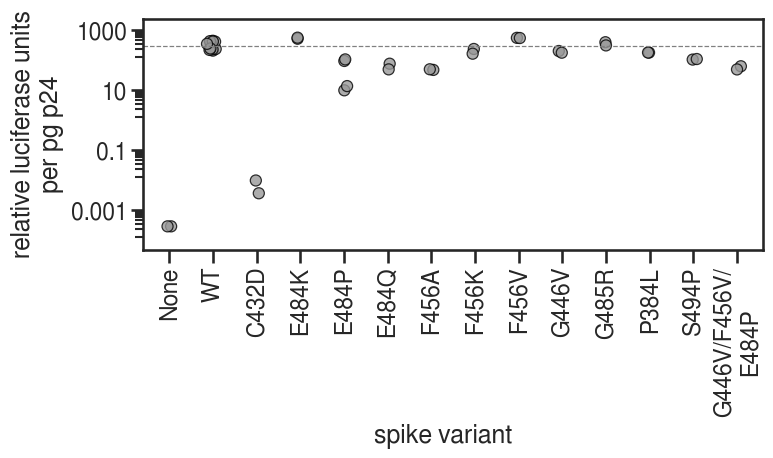

In [10]:
doubles = ['F456A/E484P', 'F456V/E484P', 'G446V/F456V']

medrlu_p24_nodoubles = (ggplot(df[~df['mut_order'].isin(doubles)], aes(x='mut_order', y='Med RLU/pg p24', fill='Used in neuts')) +
            geom_point(size=4,alpha=0.8, position=position_jitterdodge(jitter_width=0.2, jitter_height=0, dodge_width=0.2, random_state=123)) +
#             geom_crossbar(data=luc_titers.groupby('Spike', as_index=False).aggregate(Titer=pd.NamedAgg('Avg RLU per mL', 'mean')),
#                           mapping=aes(x='Spike', y='Titer', ymin='Titer', ymax='Titer'), color='black') +
            scale_fill_manual(values=[CBP[0], CBP[0]], guide=False) +
            theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5),
                  figure_size=(8,3)) +
            geom_hline(yintercept=np.median(df[df['mut_order']=='WT']['Med RLU/pg p24']), 
                       linetype='dashed', color='grey') +
            scale_y_continuous(trans='log10', limits=[0.0001, 1e3]) +
            ylab('relative luciferase units\nper pg p24') +
            xlab('spike variant')
            )

_ = medrlu_p24_nodoubles.draw()

plotfile = f'{resultsdir}/median_p24_norm_titers_nodoubles.pdf'
print(f"Saving to {plotfile}")
medrlu_p24_nodoubles.save(plotfile, verbose=False)

## Convert to markdown

In [11]:
!jupyter nbconvert mutant_titers.ipynb --to markdown

[NbConvertApp] Converting notebook mutant_titers.ipynb to markdown
[NbConvertApp] Support files will be in mutant_titers_files/
[NbConvertApp] Making directory mutant_titers_files
[NbConvertApp] Making directory mutant_titers_files
[NbConvertApp] Making directory mutant_titers_files
[NbConvertApp] Writing 19755 bytes to mutant_titers.md
